In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(context='paper', style='whitegrid', color_codes=True, font_scale=1.8)
colorcycle = [(0.498, 0.788, 0.498),
              (0.745, 0.682, 0.831),
              (0.992, 0.753, 0.525),
              (0.220, 0.424, 0.690),
              (0.749, 0.357, 0.090),
              (1.000, 1.000, 0.600),
              (0.941, 0.008, 0.498),
              (0.400, 0.400, 0.400)]
sns.set_palette(colorcycle)
mpl.rcParams['figure.max_open_warning'] = 65
mpl.rcParams['figure.figsize'] = [12, 7]

from speclib import misc, plotting

%matplotlib inline

In [2]:
df = pd.read_pickle('../../allan_data/RGender_.pkl')
q = misc.QuestionCompleter(df)

df.head()

,function_duties__answer,function_duties__answer_type,function_duties__question,function_duties__response,function_duties__condition,narcissism_opponents__answer,narcissism_opponents__answer_type,narcissism_opponents__question,narcissism_opponents__response,narcissism_opponents__condition,...,selfesteem_proud__answer_type,selfesteem_proud__question,selfesteem_proud__response,selfesteem_proud__condition,narcissism_excellent__answer,narcissism_excellent__answer_type,narcissism_excellent__question,narcissism_excellent__response,narcissism_excellent__condition,gender
0010fedde8e61cad5b049da6df8b5a,0.0,radio,At varetage dine praktiske pligter i hjemmet?,Slet ikke,False,1.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",2,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Uenig,False,3.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,4,False,male
002ee26a0c38a1f77b7cdeab8046cd,1.0,radio,At varetage dine praktiske pligter i hjemmet?,Lidt,False,2.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",3,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Uenig,False,2.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,3,False,male
0037c93a19a7e90580086b462ba11b,1.0,radio,At varetage dine praktiske pligter i hjemmet?,Lidt,False,1.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",2,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Enig,False,1.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,2,False,male
005b1e0298bde6b726156aefb8d88c,1.0,radio,At varetage dine praktiske pligter i hjemmet?,Lidt,False,2.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",3,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Uenig,False,1.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,2,False,male
00ad591e46eb6f3d8c474d9de9e219,1.0,radio,At varetage dine praktiske pligter i hjemmet?,Lidt,False,1.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",2,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Stærkt uenig,False,0.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,Passer slet ikke 1,False,female


In [3]:
for col, question in ((col, df[col].unique()[0]) for col in
                      sorted(df.filter(regex='alcohol.+?__question').columns)):
    print(col, question, sep='\n', end='\n--------------\n')

alcohol_binge10__question
Drukket mere end 10 genstande på en dag/aften
--------------
alcohol_binge5__question
Drukket mere end 5 genstande på en dag/aften
--------------
alcohol_debut__question
Hvor gammel var du første gang du drak mindst en genstand?
--------------
alcohol_drunk__question
Hvor mange gange er du blevet fuld af at drikke alkohol i løbet af  <u>de sidste 30 dage</u>?
--------------
alcohol_everyday__question
Drukket dig fuld på en hverdagsaften/dag, hvor du skulle i skole eller på dit fuldtidsjob dagen efter
--------------
alcohol_very_drunk__question
Drukket dig meget fuld
--------------
alcohol_volume_friday__question

--------------
alcohol_volume_monday__question

--------------
alcohol_volume_saturday__question

--------------
alcohol_volume_sunday__question

--------------
alcohol_volume_thursday__question

--------------
alcohol_volume_tuesday__question

--------------
alcohol_volume_wednesday__question

--------------
alcohol_weekend__question
Drukket alkohol 

In [4]:
misc.questionSummary(df, 'alcohol_binge5', 5)
misc.questionSummary(df, 'alcohol_binge10', 5)
misc.questionSummary(df, 'alcohol_very_drunk', 5)
misc.questionSummary(df, 'alcohol_debut', 5)
misc.questionSummary(df, 'alcohol_drunk', 5)
misc.questionSummary(df, 'alcohol_everyday', 5)
misc.questionSummary(df, 'alcohol_weekend', 5)


,response_index,answer_index,count
0,0 gange,0.0,182
1,1 gange,1.0,187
2,2 gange,2.0,164
3,3 gange,3.0,151
4,4-5 gange,4.0,118
5,6+ gange,5.0,94


,alcohol_binge5__answer,alcohol_binge5__response
792b94ad80885c219a53366de477d8,0.0,0 gange
acb4b0c97635597d3cb4c06223e008,1.0,1 gange
c1fcc5591fdbaf78c00d468ddcc43b,3.0,3 gange
e2f169c1af5636f137fa5cc8565bff,5.0,6+ gange
64be07258a81054655f0914ea2b946,3.0,3 gange


,response_index,answer_index,count
0,0 gange,0.0,344
1,1 gange,1.0,188
2,2 gange,2.0,150
3,3 gange,3.0,89
4,4-5 gange,4.0,73
5,6+ gange,5.0,52


,alcohol_binge10__answer,alcohol_binge10__response
a5db572f4e3d1512cf6aa05b1e99c1,4.0,4-5 gange
3f15eecfccfef7ec5736efdeb484a2,3.0,3 gange
01b55a9e2a33743a3b956085974184,1.0,1 gange
8216b2c7553c9c95b1f7a2c0eaea87,1.0,1 gange
bb3f9dfc64509a9dee49ec4c7e670d,3.0,3 gange


,response_index,answer_index,count
0,0 gange,0.0,306
1,1 gange,1.0,214
2,2 gange,2.0,154
3,3 gange,3.0,95
4,4-5 gange,4.0,91
5,6+ gange,5.0,36


,alcohol_very_drunk__answer,alcohol_very_drunk__response
002ee26a0c38a1f77b7cdeab8046cd,0.0,0 gange
5c6c0340c0fa515d2b2c9384dd8c1a,3.0,3 gange
9689fcc7f5d888288d249b50e97587,4.0,4-5 gange
8865bfc7fb29f3b9098217d2108e8f,0.0,0 gange
518cfea2b595a9f40393ee5a019347,4.0,4-5 gange


,response_index,answer_index,count
0,14,0.0,12
1,15,1.0,896


,alcohol_debut__answer,alcohol_debut__response
fa6888e515d215098810f7dad65d67,1.0,16
55e4ef1ebeb38d295d989862167519,1.0,15
3fae5400215adabd7c5eff79e258c0,1.0,15
f6f3c7632ba4bd438417ddf266b36f,1.0,15
3e2de6b182eae6ba165e0af0fdab66,1.0,12


,response_index,answer_index,count
0,0 gange,0.0,135
1,1 gange,1.0,124
2,2 gange,2.0,152
3,3 gange,3.0,119
4,4-5 gange,4.0,185
5,6-9 gange,5.0,133
6,10+ gange,6.0,48


,alcohol_drunk__answer,alcohol_drunk__response
898161cb1f8aeecdd6a68905b5e490,3.0,3 gange
b05b5d703303101c337ad9913b24e4,1.0,1 gange
219736781c48a0006c602ed8a4486f,0.0,0 gange
5efda76095de0d44d98fa04b3f10c4,4.0,4-5 gange
85f2ae5a83dfeb08f17108c6b9d8b2,1.0,1 gange


,response_index,answer_index,count
0,0 gange,0.0,755
1,1 gange,1.0,98
2,2 gange,2.0,24
3,3 gange,3.0,11
4,4-5 gange,4.0,2
5,6+ gange,5.0,6


,alcohol_everyday__answer,alcohol_everyday__response
2ec61ebaae3b42cca3a782d9ede97b,2.0,2 gange
cb74635bee4ced78eb46f109b96584,0.0,0 gange
6136b0f74ca0a587aa0fc059feb71a,0.0,0 gange
05b481f82201b046c2a4041e8dad58,0.0,0 gange
078a07fe7678b6a753c0bad493a079,1.0,1 gange


,response_index,answer_index,count
0,0 gange,0.0,112
1,1 gange,1.0,158
2,2 gange,2.0,197
3,3 gange,3.0,171
4,4-5 gange,4.0,182
5,6+ gange,5.0,76


,alcohol_weekend__answer,alcohol_weekend__response
e2f169c1af5636f137fa5cc8565bff,2.0,2 gange
d9c623856588a20ed6a7c5fcf1be52,1.0,1 gange
57690ec03d9bd55c5a603fdcd1674e,0.0,0 gange
82c07855fb3b3bd6c22dd0b6451a82,4.0,4-5 gange
2194c3a8874b14f9f1547f7ea1cd3e,2.0,2 gange


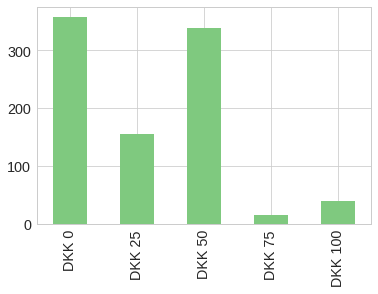

In [5]:
df.give_money__response.value_counts().loc[['DKK %d'%i for i in range(0, 101, 25)]].plot.bar() 

In [6]:
misc.questionSummary(df, q.homophily_popularity_dtu)

,response_index,answer_index,count
0,Blandt de allermest populære,0.0,36
1,I den mere populære halvdel,1.0,307
2,Omtrent som gennemsnittet,2.0,528
3,I den mindre populære halvdel,3.0,36
4,Blandt de allermindst populære,4.0,1


In [7]:
misc.questionSummary(df, q.homophily_popularity) 

,response_index,answer_index,count
0,Blandt de allermest populære,0.0,86
1,I den mere populære halvdel,1.0,316
2,Omtrent som gennemsnittet,2.0,405
3,I den mindre populære halvdel,3.0,88
4,Blandt de allermindst populære,4.0,10
5,Selvstuderende/havde ingen klasse,5.0,3


In [8]:
misc.questionSummary(df, q.homophily_socialize)

,response_index,answer_index,count
0,meget vigtig for mig,0.0,438
1,vigtig for mig,1.0,406
2,ikke så vigtig for mig,2.0,54
3,er ligegyldig,3.0,6
4,ved ikke,4.0,4


In [9]:
misc.questionSummary(df, q.live_alone)

,response_index,answer_index,count
0,Ja,0.0,365
1,Nej,1.0,543


Print `locus_of_control` questions

In [10]:
tmp = lambda st: int(re.search(r'(\d+)', st).groups()[0])
idx = sorted(df.filter(regex=r'locus_of_control.+__response').columns, key=tmp)
for col in idx:
    display(df[col].value_counts())

Mange af de ulykkelige ting der sker i folks liv er delvist fordi de er uheldige    478
Folks ulykke er et resultat af de fejl de laver                                     430
Name: locus_of_control_1__response, dtype: int64

Der vil altid være krige uanset hvor meget folk prøver at forebygge det                                   754
En af de primære årsager til at vi har krige er at folk ikke er tilstrækkeligt interesserede i politik    154
Name: locus_of_control_2__response, dtype: int64

Desværre bliver et individs værdi ofte overset uanset hvor meget  han eller hun prøver    476
I det lange løb får folk den respekt de fortjener i denne verden                          432
Name: locus_of_control_3__response, dtype: int64

Forestillingen om at lærere er unfair i forhold til studerende er nonsens                           560
De fleste studerende forstår ikke i hvor høj grad deres karakterer er påvirket af tilfældigheder    348
Name: locus_of_control_4__response, dtype: int64

Dygtige mennesker, der ikke bliver ledere har ikke udnyttet deres muligheder    570
Man kan ikke blive en effektiv leder uden ”held i sprøjten\                     338
Name: locus_of_control_5__response, dtype: int64

Nogle mennesker kan bare ikke lide en uansat hvad man gør                                         594
Folk der ikke kan få andre til at lide dem forstår ikke hvordan man finder ud af det med andre    314
Name: locus_of_control_6__response, dtype: int64

At overlade ting til skæbnen har aldrig fungeret ligeså godt for mig som at tage en beslutning om at gøre noget    577
Jeg oplever ofte at tingene går deres egen gang                                                                    331
Name: locus_of_control_7__response, dtype: int64

Når der er tale om en velforberedt studerende kan man sjældent, om nogensinde, tale om en unfair eksamen    797
Ofte er eksamensspørgsmål så langt fra pensum, at forberedelse reelt ikke giver mening                      111
Name: locus_of_control_8__response, dtype: int64

Det at få succes er et spørgsmål om hårdt arbejde. Held har intet, eller kun meget lidt at gøre med det    602
At få et godt job handler mest om at være på det rigtige sted på det rigtige tidspunkt                     306
Name: locus_of_control_9__response, dtype: int64

Den gennemsnitlige borger kan have indflydelse på politiske beslutninger                                    546
Verden køres af nogle få mennesker med magt, og der er ikke meget almindelige mennesker kan gøre ved det    362
Name: locus_of_control_10__response, dtype: int64

Når jeg laver planer, er jeg næsten sikker på, at jeg kan få dem til at fungere                                                 602
Det er ikke altid klogt at planlægge for langt ud i fremtiden, da mange ting alligevel ender med at blive afgjort tilfældigt    306
Name: locus_of_control_11__response, dtype: int64

Jeg får hvad jeg vil have. Det har intet, eller kun meget lidt, med held at gøre    720
Tit kan man ligeså godt slå plat eller krone, når man skal tage en beslutning       188
Name: locus_of_control_12__response, dtype: int64

Hvad der sker for mig, skyldes det jeg selv gør                                      756
Nogen gange føler jeg, at jeg ikke har nok kontrol over den retning mit liv tager    152
Name: locus_of_control_13__response, dtype: int64

In [11]:
misc.questionSummary(df, q.narcissism_looser)

,response_index,answer_index,count
0,Passer slet ikke 1,0.0,599
1,2,1.0,189
2,3,2.0,69
3,4,3.0,30
4,5,4.0,10
5,6 Passer fuldstændigt,5.0,11


In [12]:
idx = df.filter(regex='smoke.+__question').columns.str.replace('__question', '')
print(idx)
for col in idx:
    misc.questionSummary(df, col)

Index(['smoke_daily', 'smoke_freq', 'smoke_volume_cerut', 'smoke_volume_cigar',
       'smoke_volume_pibe', 'smoke_first_cigarette', 'smoke_volume_cigarette'],
      dtype='object')


,response_index,answer_index,count
0,12 år,3.0,2
1,13 år,4.0,3
2,14 år,5.0,5
3,15 år,6.0,9
4,16 eller mere,7.0,44


,response_index,answer_index,count
0,"Ja, dagligt",0.0,63
1,"Ja, men ikke dagligt",1.0,98
2,"Nej, men jeg har røget tidligere",2.0,120
3,"Nej, jeg har aldrig røget",3.0,627


,response_index,answer_index,count
0,0.0,0.0,63


,response_index,answer_index,count
0,0.0,0.0,63


,response_index,answer_index,count
0,0.0,0.0,63


,response_index,answer_index,count
0,9 år eller yngre,0.0,6
1,11 år,1.0,4
2,10 år,2.0,4
3,12 år,3.0,13
4,13 år,4.0,27
5,14 år,5.0,65
6,15 år,6.0,60
7,16 eller mere,7.0,104


,response_index,answer_index,count
0,0.0,0.0,1
1,2.0,2.0,2
2,3.0,3.0,3
3,5.0,5.0,11
4,6.0,6.0,3
5,7.0,7.0,2
6,8.0,8.0,4
7,9.0,9.0,1
8,10.0,10.0,13
9,12.0,12.0,1


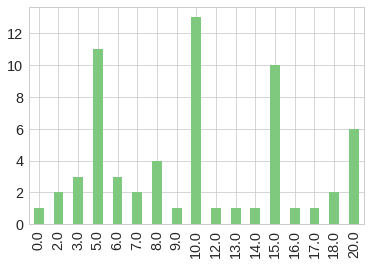

In [13]:
misc.questionResponse(df, q.smoke_volume_cigarette).plot.bar() 